<a href="https://colab.research.google.com/github/Rizcen/ML-LAB-1/blob/main/ConcreteCompressiveStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
from math import sqrt
from sklearn.impute import SimpleImputer

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#URL: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
#Name: Concrete Compressive Strength





Mounted at /content/drive


In [39]:

dts = pd.DataFrame(pd.read_csv('/content/Concrete_Data.csv'))
dts.head()
dts.info()
dts.describe()
dts.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

(1030, 9)

In [40]:
dts_dup = dts.copy()
dts_dup.info()
dts_dup.head()
dts_dup.describe()
dts_dup.shape
checkNULL = dts_dup.isnull()
checkNULL = checkNULL.any(axis=1)









<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [41]:
dts_dup.drop_duplicates(subset = None, inplace = True)
print(dts_dup.shape)
print(dts.shape)

(1005, 9)
(1030, 9)


In [42]:
pl = make_pipeline(StandardScaler(), LinearRegression())

In [63]:
print(dts.columns)
print(dts.head())

X = dts['Cement (component 1)(kg in a m^3 mixture)']
y = dts['Concrete compressive strength(MPa, megapascals) ']

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                             

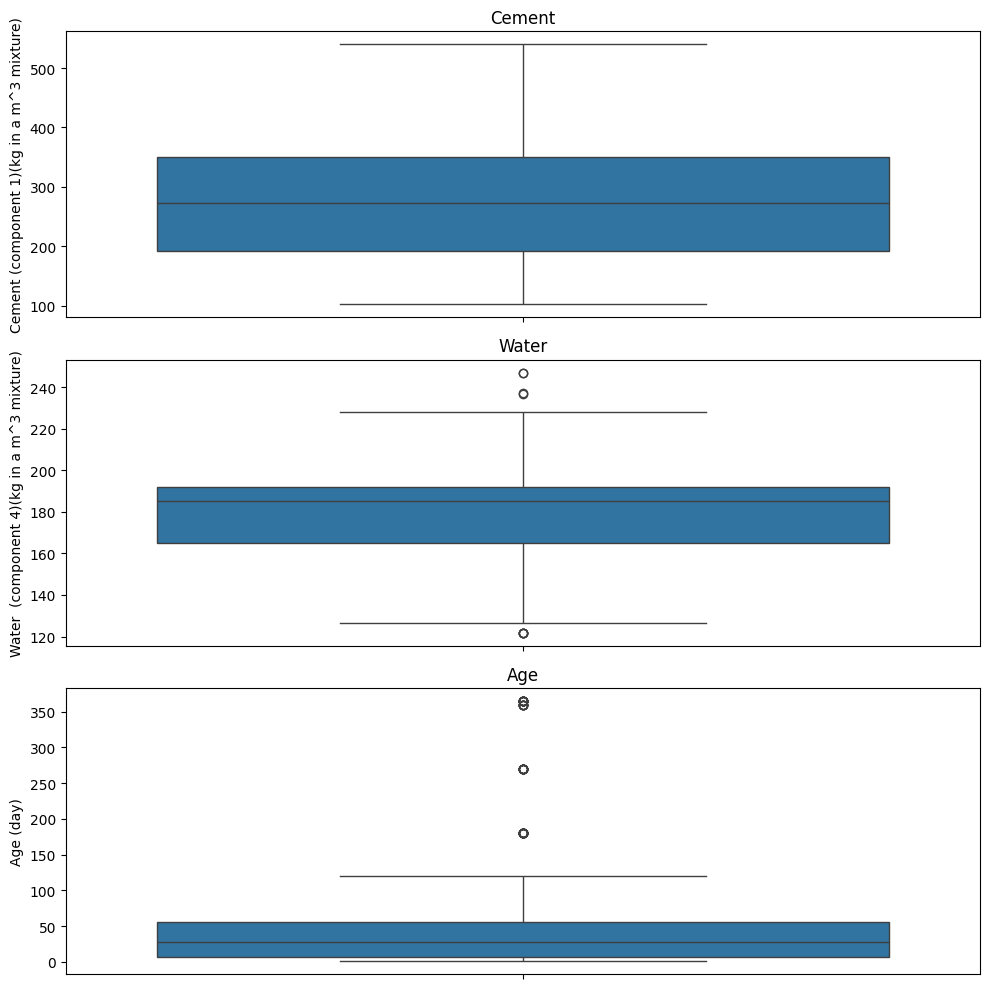

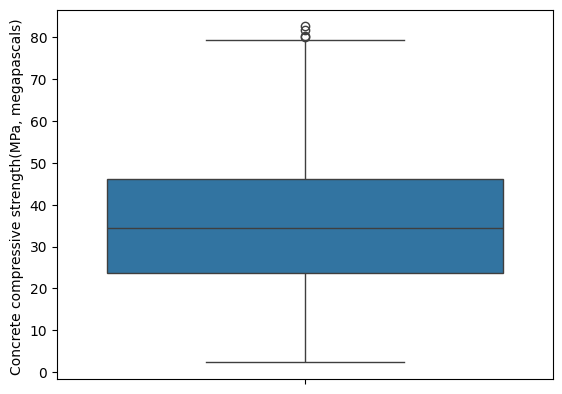

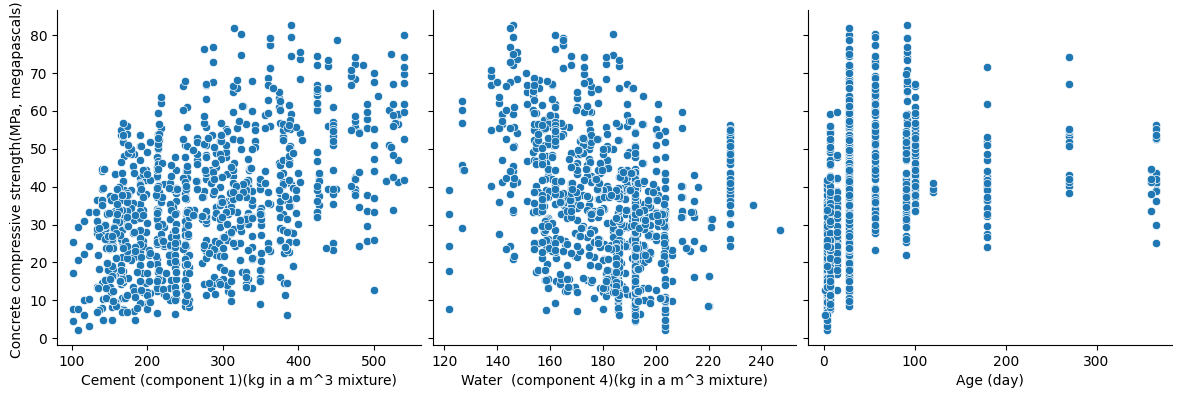

In [69]:
fig, axs = plt.subplots(3, figsize=(10, 10))

plt1 = sns.boxplot(dts['Cement (component 1)(kg in a m^3 mixture)'], ax=axs[0])
plt1.set_title('Cement')

plt2 = sns.boxplot(dts['Water  (component 4)(kg in a m^3 mixture)'], ax=axs[1])
plt2.set_title('Water')

plt3 = sns.boxplot(dts['Age (day)'], ax=axs[2])
plt3.set_title('Age')

plt.tight_layout()
plt.show()

sns.boxplot(dts['Concrete compressive strength(MPa, megapascals) '])
plt.show()

sns.pairplot(dts, x_vars=['Cement (component 1)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Age (day)'], y_vars='Concrete compressive strength(MPa, megapascals) ', height=4, aspect=1, kind='scatter')
plt.show()

In [73]:
X = dts[['Cement (component 1)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Age (day)']].values
y = dts['Concrete compressive strength(MPa, megapascals) '].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.params)
print(lr.summary())

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R Squared Error (RMSE):", rmse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

plt.scatter(X_train[:, 0], y_train)
plt.plot(X_train, 0.0703 + -0.2739 + 0.0998 *X_train, 'r')
plt.show()

y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

NameError: name 'sm' is not defined